In [33]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from config_db import DB_HOST, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD

In [34]:
def get_connection():
    conn = psycopg2.connect(
        host = DB_HOST,
        port = DB_PORT,
        dbname = DB_NAME,
        user = DB_USER,
        password = DB_PASSWORD
    )
    return conn

In [35]:
def cargar_datos():
    conn = get_connection()
    
    # cargar tablas a Dataframes
    df_estudiantes = pd.read_sql("SELECT * FROM estudiantes;", conn)
    df_cursos = pd.read_sql("SELECT * FROM cursos;", conn)
    df_inscripciones = pd.read_sql("SELECT * FROM inscripciones;", conn)
    conn.close()
    return df_estudiantes, df_cursos, df_inscripciones

In [36]:
def preparar_dataset(df_estudiantes, df_cursos, df_inscripciones):
    
    # Hacer join para tener un dataset bueno
    df = df_inscripciones.merge(df_estudiantes,
                                how='left',
                                left_on="id_estudiante",
                                right_on="id_estudiante").merge(
                                    df_cursos,how='left',
                                    left_on="id_curso",
                                    right_on="id_curso")
       
    # Conversion de tipos                           
    df["fecha_inscripcion"] = pd.to_datetime(df["fecha_inscripcion"])
    
    # Ejemplo de validacion con numpy
    # detectar calificaciones fuera de rango [0,10]
    mascara_fuera_rango = (df["calificacion"] < 0) | (df["calificacion"] > 10)
    df["calificacion_valida"] = np.where(mascara_fuera_rango, 0, 1)
    
    
    # Ejemplo de limpieza: si hay NaN en calificacion, los marcamos como 0
    df["calificacion"] = df["calificacion"].fillna(0)
    return df

In [37]:
def graficar_caja_calificaciones_por_carrera(df):
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df, x="carrera", y="calificacion")
    plt.title("Distribucion de calificaciones por carera")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [38]:
def graficar_caja_calificaciones_ppor_curso(df):
    plt.figure(figsize=(8,5))
    sns.lineplot(data=df, x="nombre_curso", y="calificacion")
    plt.title("Distribucion de calificaciones por curso")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

C:\Users\T-City\AppData\Local\Temp\ipykernel_6500\3948093633.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_estudiantes = pd.read_sql("SELECT * FROM estudiantes;", conn)
C:\Users\T-City\AppData\Local\Temp\ipykernel_6500\3948093633.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cursos = pd.read_sql("SELECT * FROM cursos;", conn)
C:\Users\T-City\AppData\Local\Temp\ipykernel_6500\3948093633.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_inscripciones = pd.read_sql("SELECT * FROM inscripciones;", conn)


Estudiantes:
   id_estudiante           nombre  edad                  carrera
0              1       Ana LÃ³pez    20  IngenierÃ­a en Sistemas
1              2    Carlos PÃ©rez    22          AdministraciÃ³n
2              3   MarÃ­a GarcÃ­a    19  IngenierÃ­a en Sistemas
3              4  Juan RodrÃ­guez    23              ContadurÃ­a
4              5  Luis HernÃ¡ndez    21   IngenierÃ­a Industrial 

Cursos:
   id_curso            nombre_curso  semestre  creditos
0         1         ProgramaciÃ³n I         1         6
1         2          Bases de Datos         3         5
2         3  MatemÃ¡ticas Discretas         2         5
3         4          Contabilidad I         1         4
4         5            EstadÃ­stica         4         5 

Inscripciones:
   id_inscripcion  id_estudiante  id_curso fecha_inscripcion  calificacion
0               1              1         1        2025-01-10           9.5
1               2              1         2        2025-01-11           8.7
2        

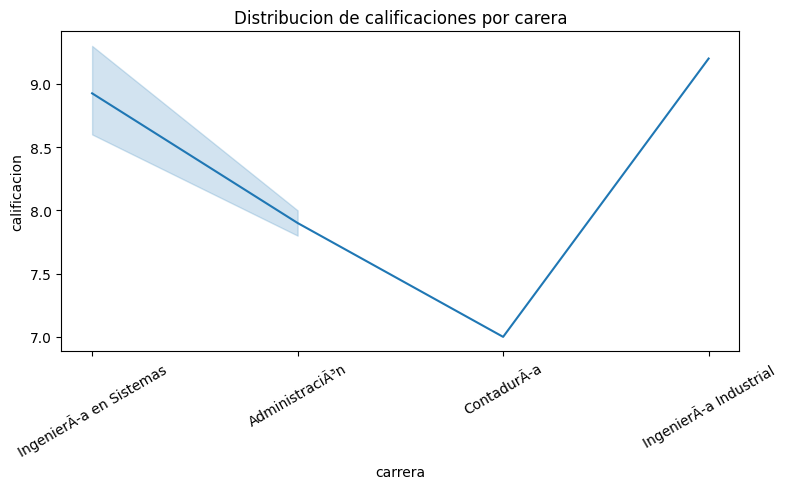

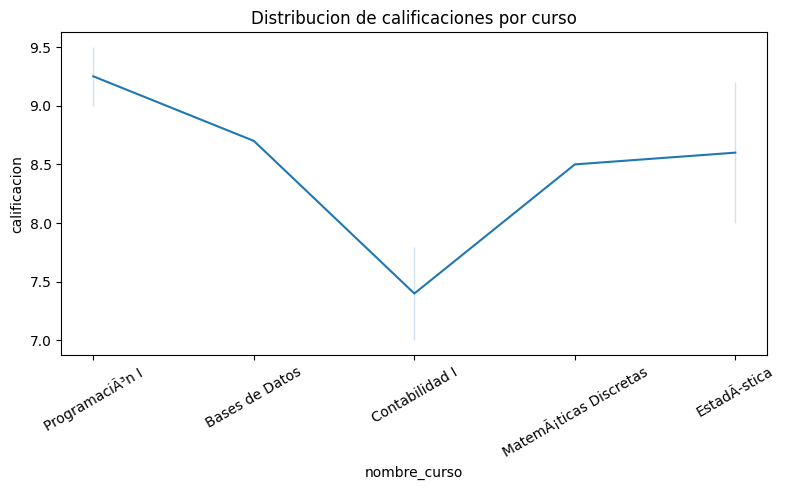

In [39]:
def main():
    # 1. Cargar tablas desde Postgres
    df_estudiantes, df_cursos, df_inscripciones = cargar_datos()
    print("Estudiantes:")
    print(df_estudiantes, "\n")
    print("Cursos:")
    print(df_cursos, "\n")
    print("Inscripciones:")
    print(df_inscripciones, "\n")

    # 2. Preparar dataset unificado
    df = preparar_dataset(df_estudiantes, df_cursos, df_inscripciones)
    print("Dataset combinados:")
    print(df, "\n")

    # 3. Graficar boxplots
    graficar_caja_calificaciones_por_carrera(df)
    graficar_caja_calificaciones_ppor_curso(df)

if __name__ == "__main__":
    main()